In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('CVD_cleaned.csv')
df.head(2)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0


In [3]:
df.shape

(308854, 19)

In [4]:
df.isna().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

In [5]:
df.dtypes

General_Health                   object
Checkup                          object
Exercise                         object
Heart_Disease                    object
Skin_Cancer                      object
Other_Cancer                     object
Depression                       object
Diabetes                         object
Arthritis                        object
Sex                              object
Age_Category                     object
Height_(cm)                     float64
Weight_(kg)                     float64
BMI                             float64
Smoking_History                  object
Alcohol_Consumption             float64
Fruit_Consumption               float64
Green_Vegetables_Consumption    float64
FriedPotato_Consumption         float64
dtype: object

In [6]:
df.drop(columns=['Height_(cm)','Weight_(kg)'],inplace=True)

In [7]:
df.head(2)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,28.29,No,0.0,30.0,0.0,4.0


In [8]:
for i in df.columns:
    print(i,df[i].unique())

General_Health ['Poor' 'Very Good' 'Good' 'Fair' 'Excellent']
Checkup ['Within the past 2 years' 'Within the past year' '5 or more years ago'
 'Within the past 5 years' 'Never']
Exercise ['No' 'Yes']
Heart_Disease ['No' 'Yes']
Skin_Cancer ['No' 'Yes']
Other_Cancer ['No' 'Yes']
Depression ['No' 'Yes']
Diabetes ['No' 'Yes' 'No, pre-diabetes or borderline diabetes'
 'Yes, but female told only during pregnancy']
Arthritis ['Yes' 'No']
Sex ['Female' 'Male']
Age_Category ['70-74' '60-64' '75-79' '80+' '65-69' '50-54' '45-49' '18-24' '30-34'
 '55-59' '35-39' '40-44' '25-29']
BMI [14.54 28.29 33.47 ... 63.83 19.09 56.32]
Smoking_History ['Yes' 'No']
Alcohol_Consumption [ 0.  4.  3.  8. 30.  2. 12.  1.  5. 10. 20. 17. 16.  6. 25. 28. 15.  7.
  9. 24. 11. 29. 27. 14. 21. 23. 18. 26. 22. 13. 19.]
Fruit_Consumption [ 30.  12.   8.  16.   2.   1.  60.   0.   7.   5.   3.   6.  90.  28.
  20.   4.  80.  24.  15.  10.  25.  14. 120.  32.  40.  17.  45. 100.
   9.  99.  96.  35.  50.  56.  48.  27.  7

The Diabetes column has four values - Yes,No,No pre-diabetes or borderline diabetes and Yes, but female told only during pregnancy. So replacing the last two values with pre-diabetes and gestational diabetes,respectively.

In [9]:
df['Diabetes'] = df['Diabetes'].map({'No, pre-diabetes or borderline diabetes':'Pre-Diabetes','Yes, but female told only during pregnancy':'Gestational Diabetes','Yes':'Yes','No':'No'})

In [10]:
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,24.37,Yes,0.0,8.0,4.0,0.0


# Outliner removal

In [11]:
#columns for outlier removal
cols = ['BMI','Alcohol_Consumption','Fruit_Consumption','Green_Vegetables_Consumption','FriedPotato_Consumption']

#IQR for the selected columns
Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

#Threshold for outlier removal
threshold = 1.5

#Find index of outliers 
index = np.where((df[cols] < (Q1-threshold*IQR)) | df[cols] > (Q3 + threshold*IQR))[0]

#drop outliers
df.drop(df.index[index])

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,24.37,Yes,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,25-29,29.05,No,4.0,30.0,8.0,0.0
308850,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,65-69,21.48,No,8.0,15.0,60.0,4.0
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,Gestational Diabetes,No,Female,30-34,24.69,Yes,4.0,40.0,8.0,4.0
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,23.73,No,3.0,30.0,12.0,0.0


In [12]:
df.describe()

,BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,28.626211,5.096366,29.835200,15.110441,6.296616
std,6.522323,8.199763,24.875735,14.926238,8.582954
min,12.020000,0.000000,0.000000,0.000000,0.000000
25%,24.210000,0.000000,12.000000,4.000000,2.000000
50%,27.440000,1.000000,30.000000,12.000000,4.000000
75%,31.850000,6.000000,30.000000,20.000000,8.000000
max,99.330000,30.000000,120.000000,128.000000,128.000000


In [13]:
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,24.37,Yes,0.0,8.0,4.0,0.0


# Exploratory Data Analysis

In the exploratory data analysis, I will be looking at the data and try to understand the data. I will be analyzing the data to find the relationship between the features and the target variables.I will begin looking at the distribution of data across all the variable.Then I will look at the relationship between the features and the target variable

# Patient demographics

Text(0.5, 1.0, 'BMI Distribution')

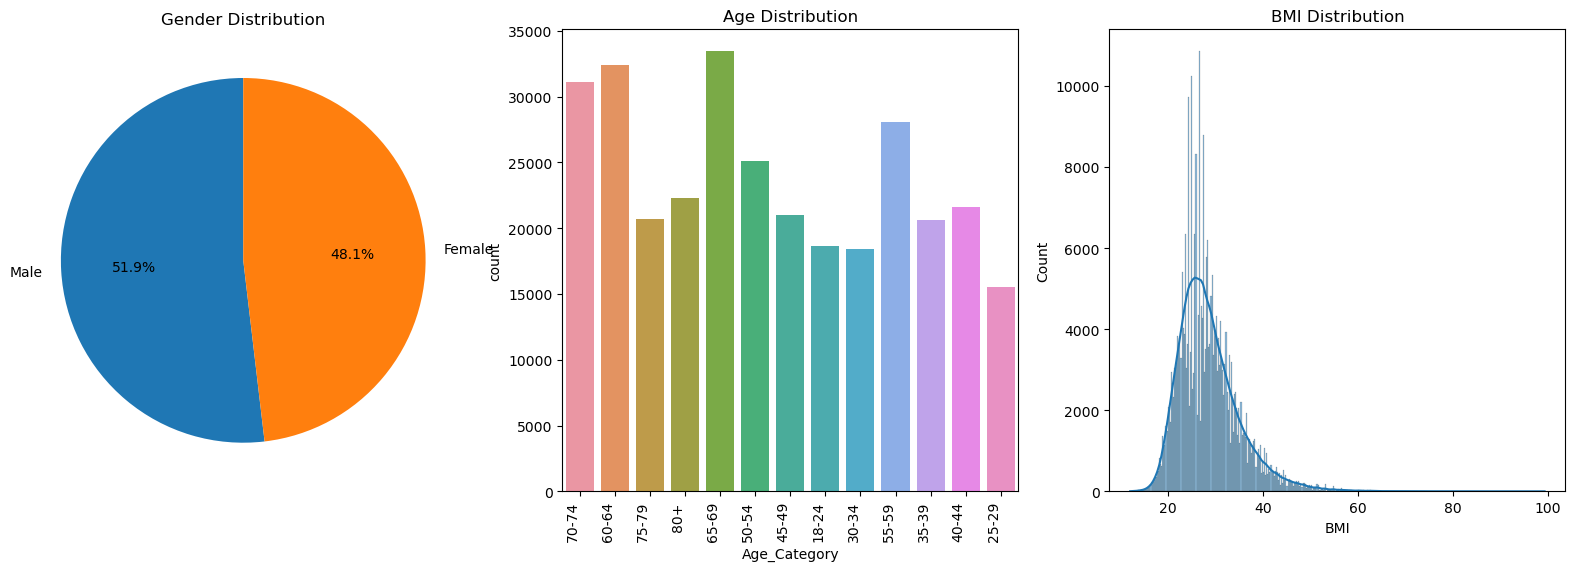

In [14]:
fig, ax = plt.subplots(1,3,figsize=(20, 6))
ax[0].pie(df['Sex'].value_counts(), labels = ['Male', 'Female'], autopct='%1.1f%%', startangle=90)
ax[0].set_title('Gender Distribution')
sns.countplot(x = 'Age_Category', data = df, ax = ax[1]).set_title('Age Distribution')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90, ha='right')
sns.histplot(x = 'BMI', data = df, ax = ax[2], kde = True).set_title('BMI Distribution')

Text(0.5, 1.0, 'General Health and Checkup')

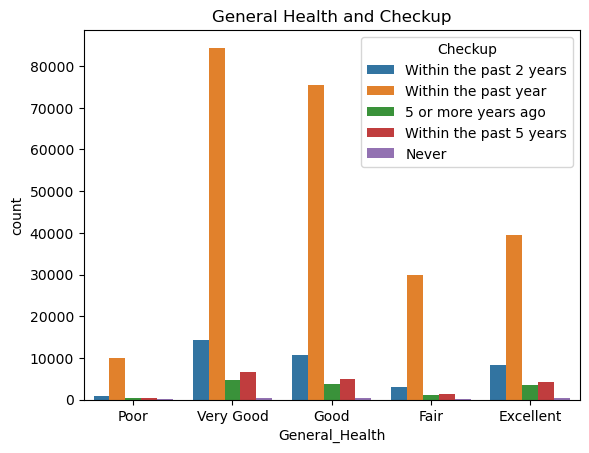

In [15]:
sns.countplot(x='General_Health', data=df,hue='Checkup').set_title('General Health and Checkup')

Text(0.5, 1.0, 'General Health and Exercise')

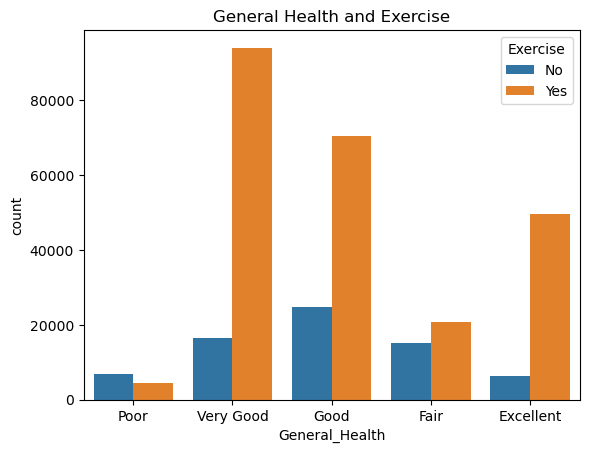

In [16]:
sns.countplot(x='General_Health', data=df,hue='Exercise').set_title('General Health and Exercise')

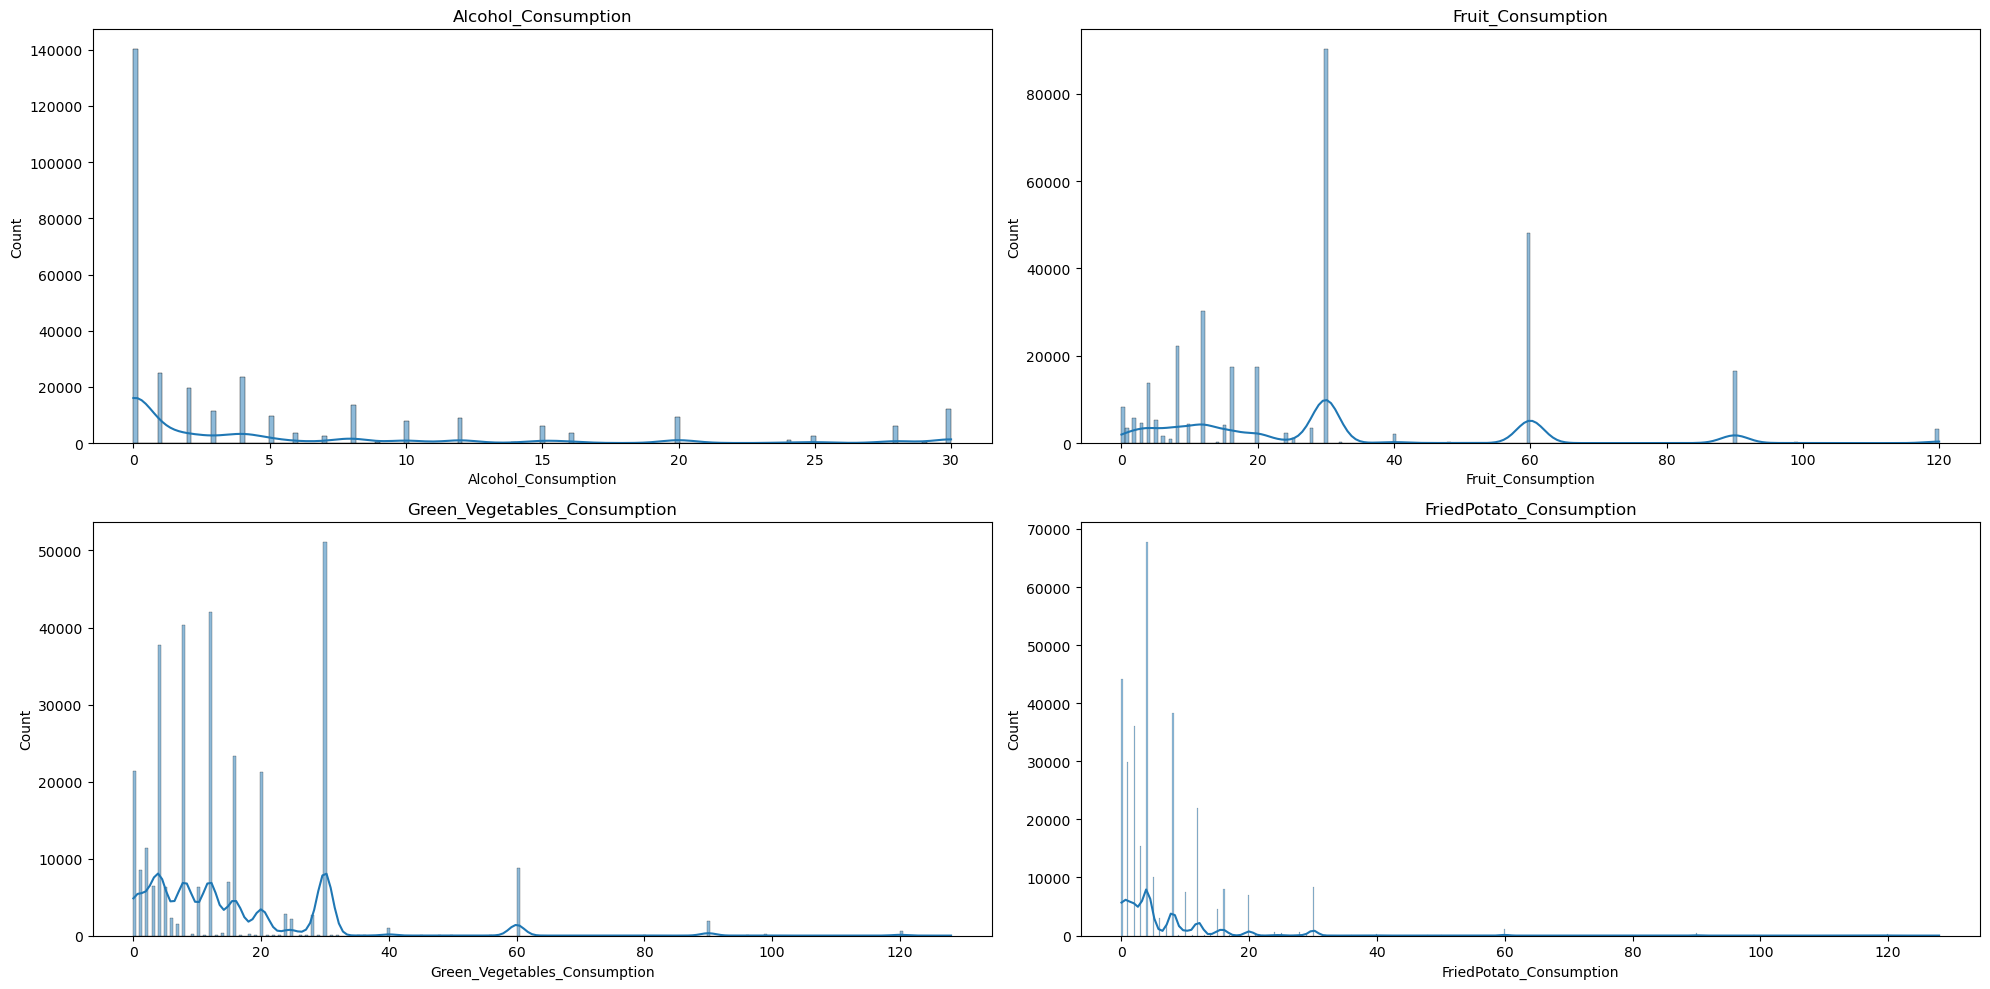

In [18]:
fig, ax = plt.subplots(2,2,figsize=(20,10))
sns.histplot(x='Alcohol_Consumption', data=df, ax=ax[0,0],kde=True).set_title('Alcohol_Consumption')
sns.histplot(x='Fruit_Consumption', data=df, ax=ax[0,1],kde=True).set_title('Fruit_Consumption')
sns.histplot(x='Green_Vegetables_Consumption', data=df, ax=ax[1,0],kde=True).set_title('Green_Vegetables_Consumption')
sns.histplot(x='FriedPotato_Consumption', data=df, ax=ax[1,1],kde=True).set_title('FriedPotato_Consumption')
plt.tight_layout()

Text(0.5, 1.0, 'Arthritis')

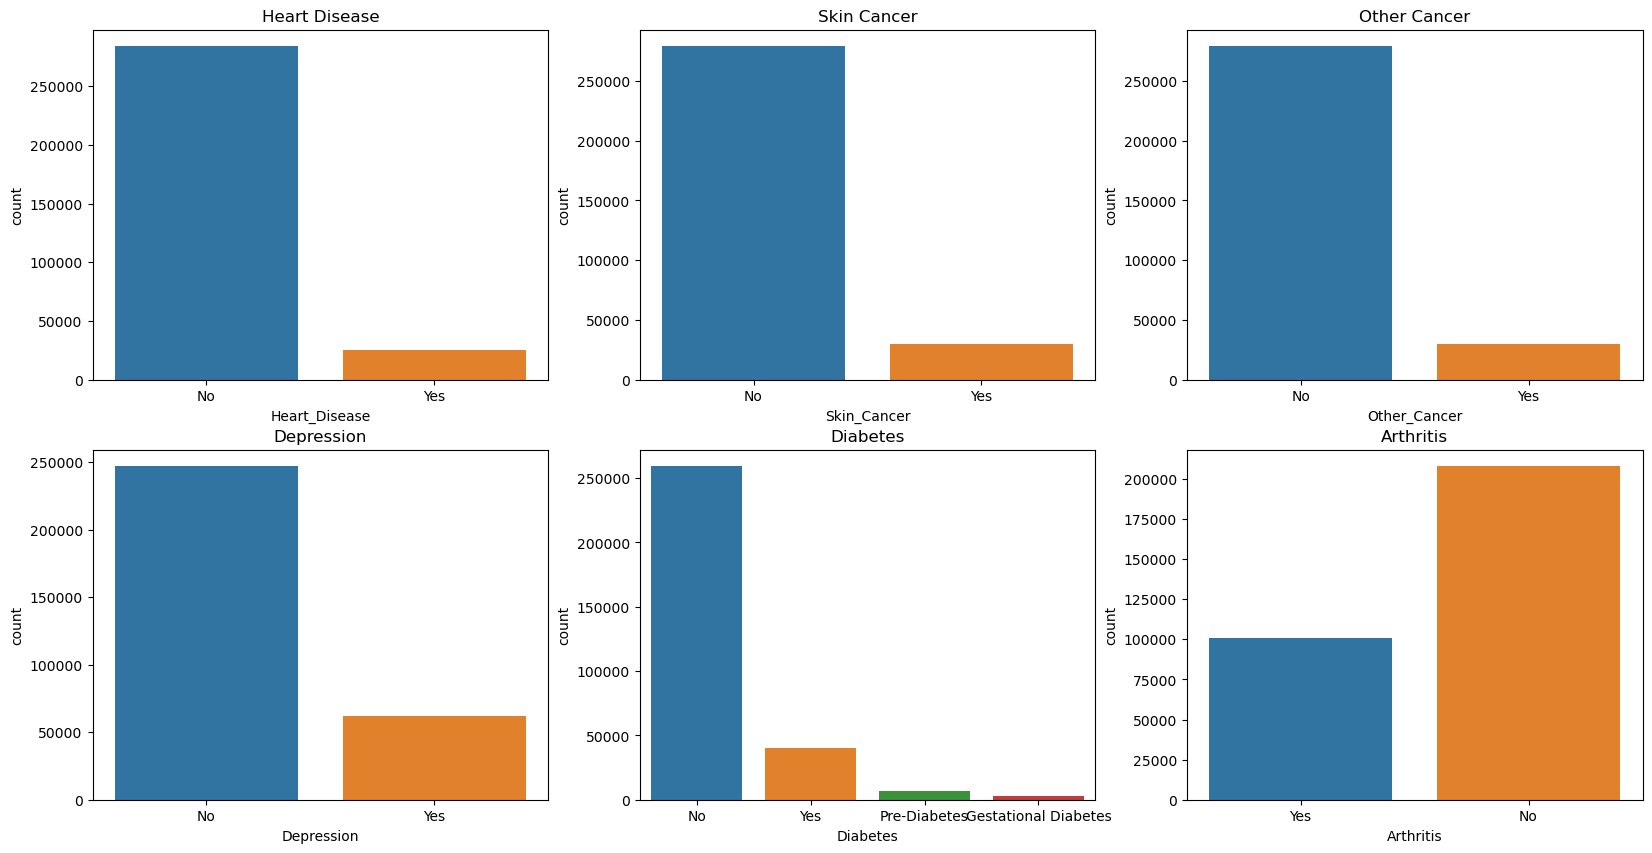

In [19]:
fig, ax = plt.subplots(2,3,figsize=(20, 10))
sns.countplot(x = 'Heart_Disease', data = df, ax = ax[0,0]).set_title('Heart Disease')
sns.countplot(x = 'Skin_Cancer', data = df, ax = ax[0,1]).set_title('Skin Cancer')
sns.countplot(x = 'Other_Cancer', data = df, ax = ax[0,2]).set_title('Other Cancer')
sns.countplot(x = 'Depression', data = df, ax = ax[1,0]).set_title('Depression')
sns.countplot(x = 'Diabetes', data = df, ax = ax[1,1]).set_title('Diabetes')
sns.countplot(x = 'Arthritis', data = df, ax = ax[1,2]).set_title('Arthritis')

Text(0.5, 1.0, 'Smoking History')

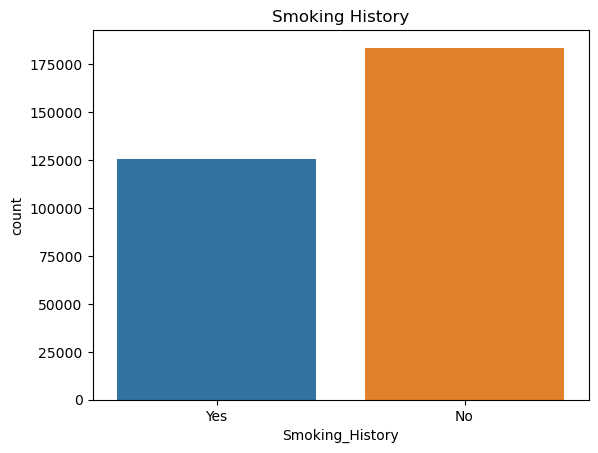

In [20]:
sns.countplot(x = 'Smoking_History', data = df ).set_title('Smoking History')

Text(0.5, 1.0, 'BMI Distribution and Heart Disease')

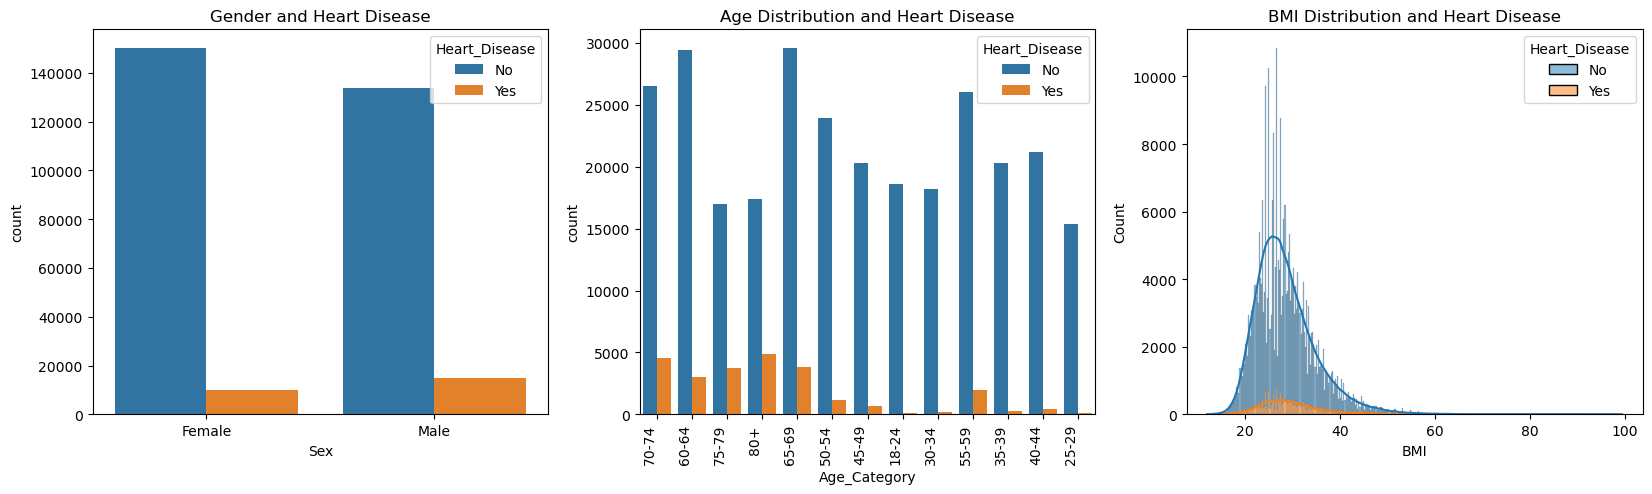

In [21]:
fig, ax = plt.subplots(1,3,figsize=(20, 5))
sns.countplot(x = 'Sex', data = df, hue  = 'Heart_Disease', ax = ax[0]).set_title('Gender and Heart Disease')
sns.countplot(x = 'Age_Category', data = df, ax = ax[1], hue = 'Heart_Disease').set_title('Age Distribution and Heart Disease')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90, ha='right')
sns.histplot(x = 'BMI', data = df, ax = ax[2], kde = True, hue = 'Heart_Disease', multiple = 'stack').set_title('BMI Distribution and Heart Disease')

Text(0.5, 1.0, 'General Health and Heart Disease')

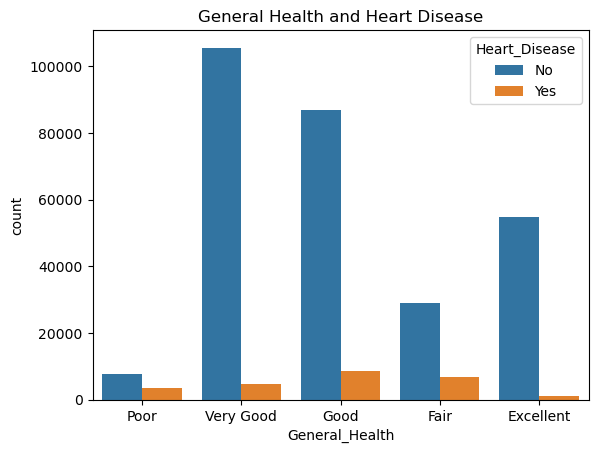

In [22]:
sns.countplot(x = 'General_Health', data = df, hue  = 'Heart_Disease').set_title('General Health and Heart Disease')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Within the past 2 years'),
  Text(1, 0, 'Within the past year'),
  Text(2, 0, '5 or more years ago'),
  Text(3, 0, 'Within the past 5 years'),
  Text(4, 0, 'Never')])

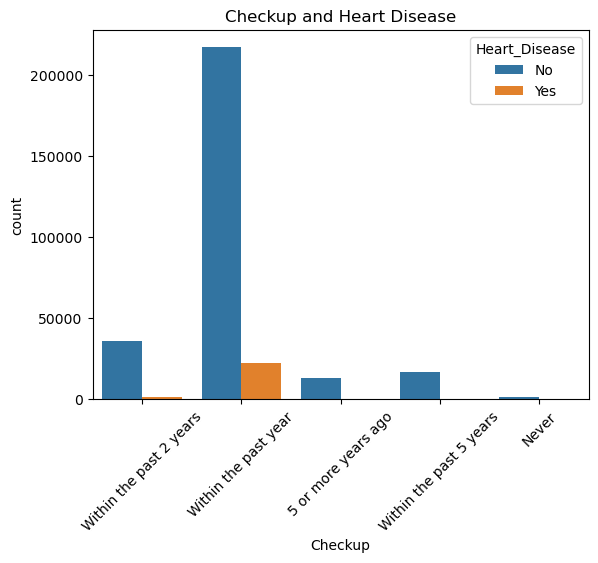

In [24]:
sns.countplot(x = 'Checkup', data = df, hue  = 'Heart_Disease').set_title('Checkup and Heart Disease')
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Exercise and Heart Disease')

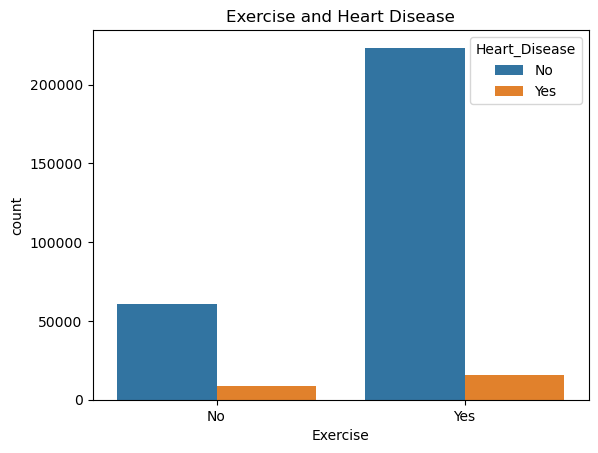

In [25]:
sns.countplot(x = 'Exercise', data = df, hue  = 'Heart_Disease').set_title('Exercise and Heart Disease')

# Data Preprocessing 2

Label encoding the categorical variables

In [26]:
from sklearn.preprocessing import LabelEncoder

In [28]:
cols = ['General_Health','Checkup','Exercise','Heart_Disease','Skin_Cancer','Other_Cancer','Depression','Diabetes','Arthritis','Sex','Age_Category','Smoking_History']
le = LabelEncoder()
for i in cols:
    le.fit(df[i])
    df[i] = le.transform(df[i])
    print(i,df[i].unique())

General_Health [3 4 2 1 0]
Checkup [2 4 0 3 1]
Exercise [0 1]
Heart_Disease [0 1]
Skin_Cancer [0 1]
Other_Cancer [0 1]
Depression [0 1]
Diabetes [1 3 2 0]
Arthritis [1 0]
Sex [0 1]
Age_Category [10  8 11 12  9  6  5  0  2  7  3  4  1]
Smoking_History [1 0]


# correlation 

<AxesSubplot:>

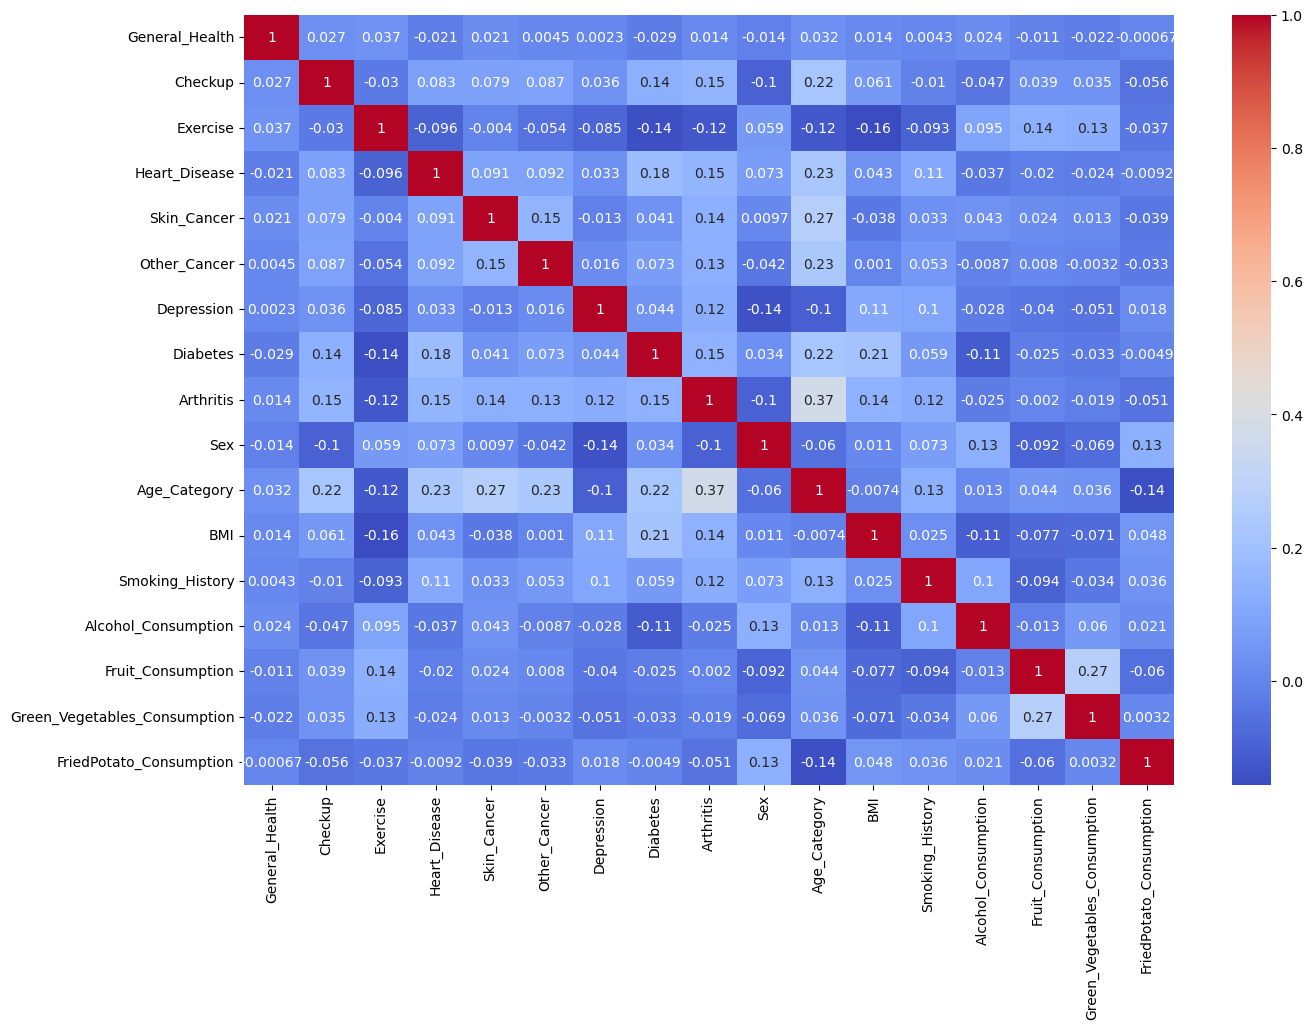

In [30]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

There is no major correlation among the variables

# Train Test Split

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Heart_Disease']),df['Heart_Disease'], test_size=0.2, random_state=0)

# Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0, max_features='sqrt', n_estimators=200, class_weight='balanced')

In [37]:
rf.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_features='sqrt',
                       n_estimators=200, random_state=0)

In [45]:
rf.score(X_train,y_train)

0.9999757166620123

In [40]:
rf_pred = rf.predict(X_test)

# Decision Tree Classifier

In [42]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0, max_depth=12, min_samples_leaf=2, min_samples_split=2, class_weight='balanced')

In [43]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=12,
                       min_samples_leaf=2, random_state=0)

In [44]:
dtc.score(X_train, y_train)

0.7352954270427347

In [46]:
dtc_pred = dtc.predict(X_test)

# Model Evaluation

Text(0.5, 1.0, 'Decision Tree')

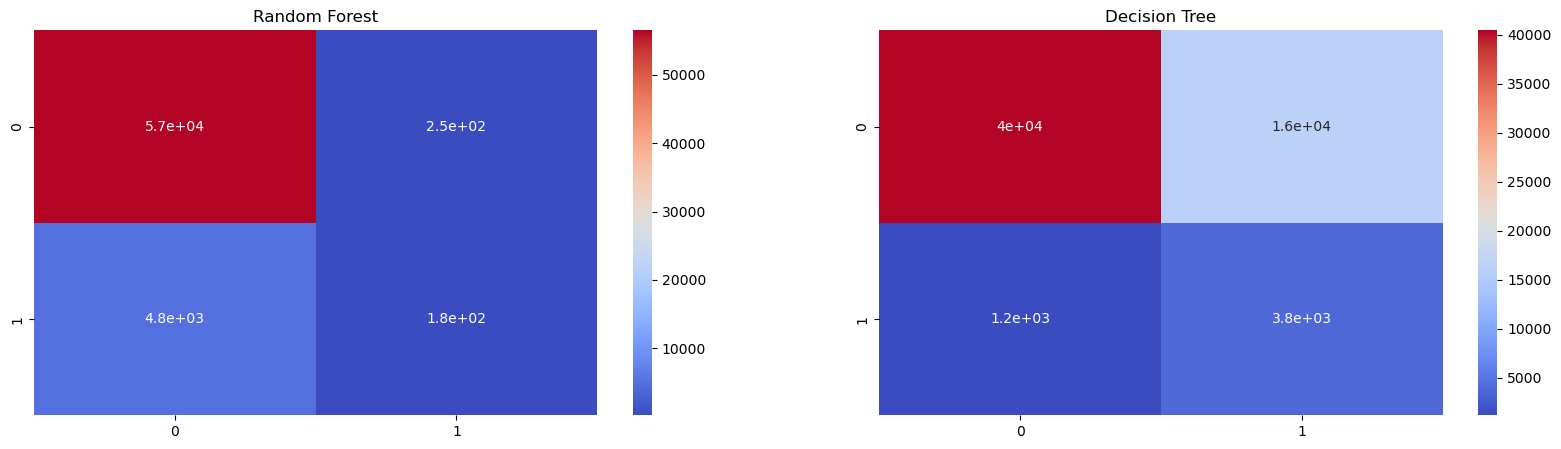

In [50]:
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(1,2, figsize = (20,5))
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, cmap='coolwarm', ax=ax[0]).set_title('Random Forest')
sns.heatmap(confusion_matrix(y_test, dtc_pred), annot = True, cmap = 'coolwarm', ax = ax[1]).set_title('Decision Tree')

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Random Forest')
print('Accuracy Score: ', accuracy_score(y_test, rf_pred))
print('Precision Score: ', precision_score(y_test, rf_pred))
print('Recall Score: ', recall_score(y_test, rf_pred))
print('F1 Score: ', f1_score(y_test, rf_pred))

Random Forest
Accuracy Score:  0.9180359715724207
Precision Score:  0.4125874125874126
Recall Score:  0.035485164394546916
F1 Score:  0.06534982462617685


In [53]:
print('Decision Tree')
print('Accuracy Score: ', accuracy_score(y_test, dtc_pred))
print('Precision Score: ', precision_score(y_test, dtc_pred))
print('Recall Score: ', recall_score(y_test, dtc_pred))
print('F1 Score: ', f1_score(y_test, dtc_pred))

Decision Tree
Accuracy Score:  0.7167602920464295
Precision Score:  0.18931942374565325
Recall Score:  0.7640336808340016
F1 Score:  0.30344772672983517


# Conclusion

From the exploratory data analysis, it was found the risk of having a cardiovascular disease increases with increasing age and the people with age above 55 are more prone to this disease, with maximum number patients with cardiovascular disease in 80+ years of age. In addition to that, the patients with higher BMI are more likely to have cardiovascular disease. The patients of older age who exercise are prone cardiovascular disease, which may be due to extensive pressure on the heart. The dietary habits of the patient also have some contribution to the cardiovascular disease. The patients who consume higher amount of fruits and green vegetables are less prone to cardiovascular disease. However, the patients who consume fried potatoes are more prone to cardiovascular disease. The patients who smoke or used to smoke are more prone to cardiovascular disease. But incontrast to my belief, any of the previous medical history such as cancer, arthritis, diabetes or depression have no major effect on cardiovascular disease.